# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and celsius
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | tolanaro
Processing Record 3 of Set 1 | novodvinsk
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | al kharijah
Processing Record 9 of Set 1 | kataragama
City not found. Skipping...
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | lodja
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | ciudad lazaro cardenas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.51,87,97,13.96,TF,1727290881
1,tolanaro,-25.0319,46.9987,24.04,78,75,8.23,MG,1727290883
2,novodvinsk,64.4165,40.8122,11.86,71,95,4.57,RU,1727290884
3,nemuro,43.3236,145.5750,16.10,81,100,6.93,JP,1727290886
4,ola,59.5833,151.2833,4.10,59,0,1.52,RU,1727290887


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.51,87,97,13.96,TF,1727290881
1,tolanaro,-25.0319,46.9987,24.04,78,75,8.23,MG,1727290883
2,novodvinsk,64.4165,40.8122,11.86,71,95,4.57,RU,1727290884
3,nemuro,43.3236,145.5750,16.10,81,100,6.93,JP,1727290886
4,ola,59.5833,151.2833,4.10,59,0,1.52,RU,1727290887


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

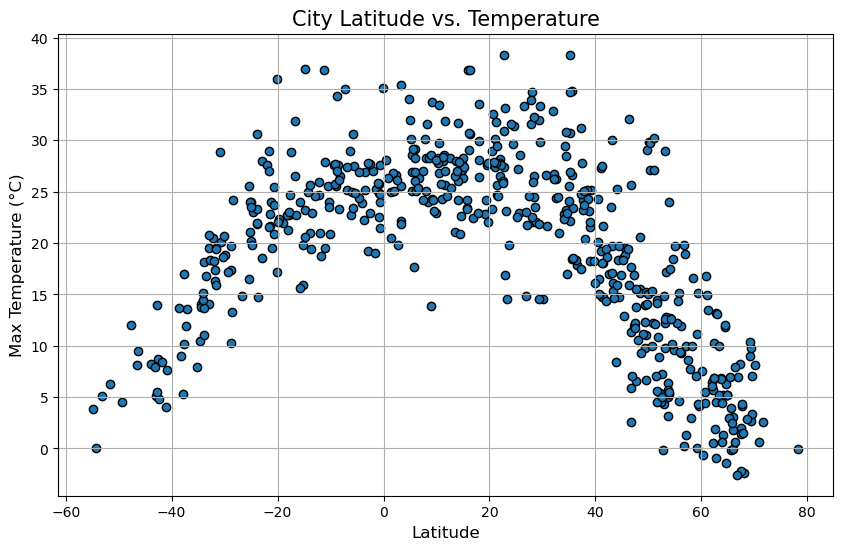

In [45]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

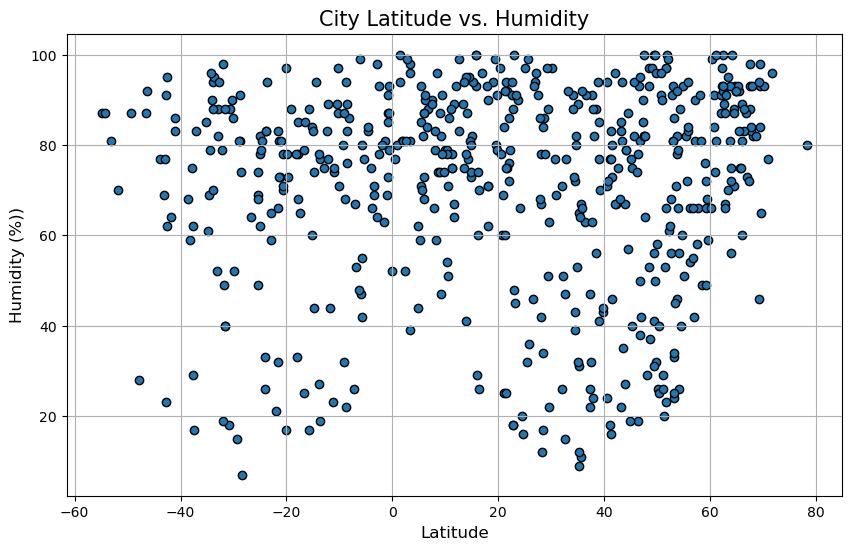

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%))", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

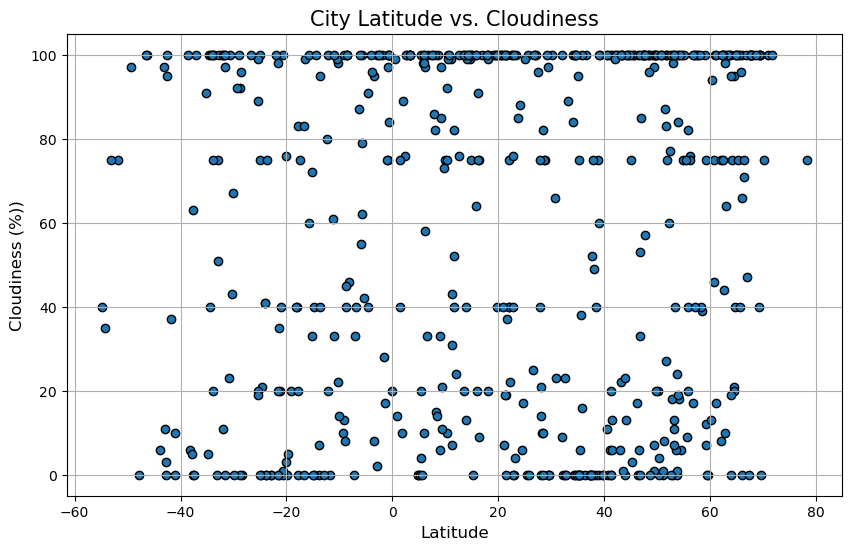

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%))", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

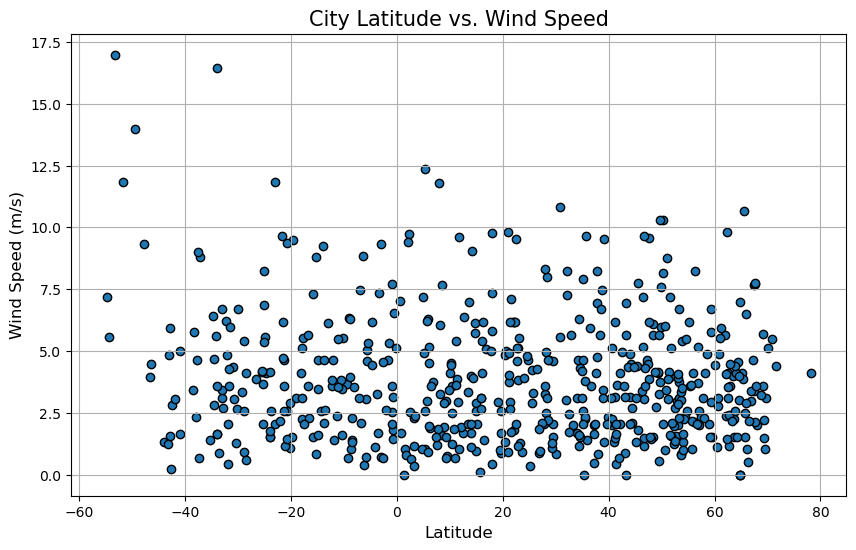

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
  
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
   
    regress_values = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, color="blue", label="Data Points")
    
    plt.plot(x_values, regress_values, color="red", label="Regression Line")
    
    r_squared = r_value ** 2
    print(f"R^2 Value: {r_squared}")
    
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(min(x_values), max(y_values), line_eq, fontsize=12, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.legend()
    plt.show()
    

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,novodvinsk,64.4165,40.8122,11.86,71,95,4.57,RU,1727290884
3,nemuro,43.3236,145.5750,16.10,81,100,6.93,JP,1727290886
4,ola,59.5833,151.2833,4.10,59,0,1.52,RU,1727290887
5,hamilton,39.1834,-84.5333,25.14,70,100,1.34,US,1727290889
6,riyadh,24.6877,46.7219,31.43,16,17,4.63,SA,1727290604


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.51,87,97,13.96,TF,1727290881
1,tolanaro,-25.0319,46.9987,24.04,78,75,8.23,MG,1727290883
8,invercargill,-46.4000,168.3500,9.45,92,100,4.47,NZ,1727290894
9,puerto natales,-51.7236,-72.4875,6.25,70,75,11.83,CL,1727290896
10,adamstown,-25.0660,-130.1015,20.22,82,100,6.87,PN,1727290897


###  Temperature vs. Latitude Linear Regression Plot

R^2 Value: 0.6365371711775489


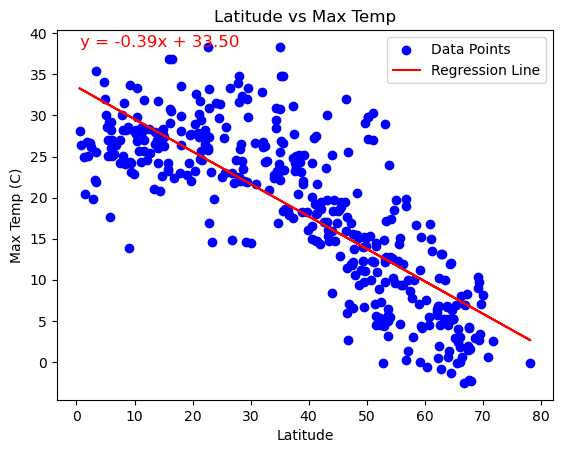

In [58]:
# Linear regression on Northern Hemisphere
plot1=plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", "Latitude vs Max Temp")
plot1


R^2 Value: 0.6203826179368248


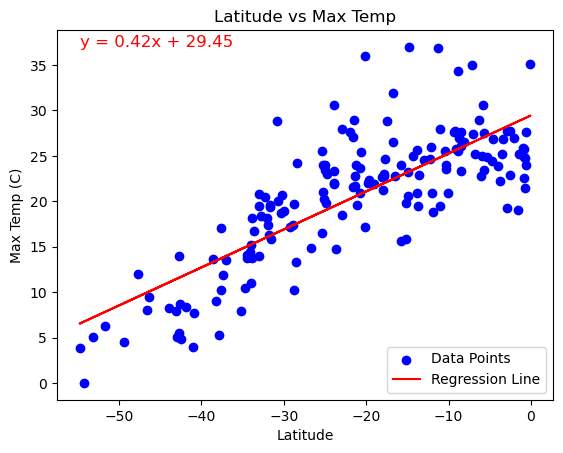

In [57]:
# Linear regression on Southern Hemisphere
plot2=plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", "Latitude vs Max Temp")
plot2

**Discussion about the linear relationship:**In the Northern Hemisphere typically there is a negative correlation: as latitude increases (moving further from the equator), maximum temperatures tend to decrease. This is due to the Earth's curvature and the angle of sunlight, where higher latitudes receive less direct sunlight, resulting in cooler temperatures. The regression line shows a negative trend, with a quite high R^2 value.  However, other factors like altitude or being near oceans can also create some changes in the data. In the case of the Southern Hemisphere, we can see that the equation has a positive slope of 0.42; however, the regression analysis shows a negative correlation as we can see in the graph, meaning as latitude increases ( moving farther from the equator towards the poles), the maximum temperature tends to decrease. Additionally, the R^2 value is almost the same as the one for the northern hemisphere as the same conditions apply.

### Humidity vs. Latitude Linear Regression Plot

R^2 Value: 1.4552178905812695e-06


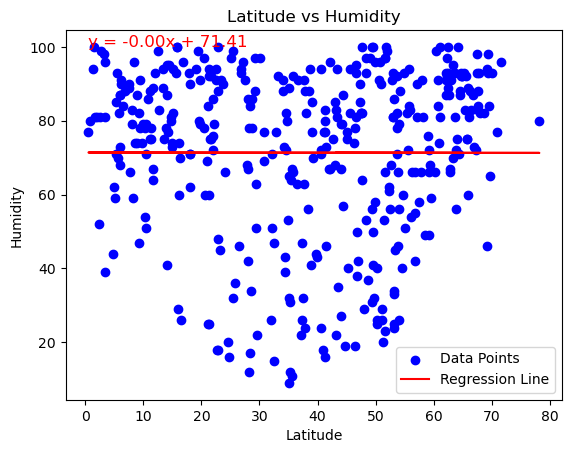

In [59]:
# Northern Hemisphere
plot3=plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")
plot3

R^2 Value: 0.0001995449585223661


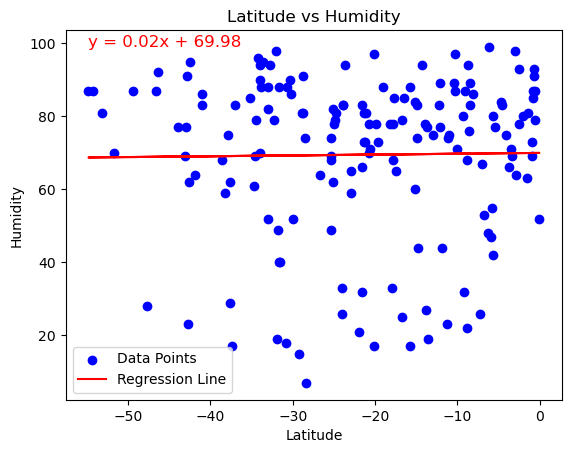

In [60]:
# Southern Hemisphere
plot4=plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")
plot4

**Discussion about the linear relationship:** There is no strong correlation between the two variables. Humidity levels do not show a consistent pattern relative to latitude, as they are more influenced by local environmental factors such as proximity to water, elevation, and regional climate conditions, rather than latitude alone. While some regions near the equator may experience higher humidity due to warmer temperatures, this trend does not hold consistently across both hemispheres. This is a reason why the R^2 values are so low for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R^2 Value: 0.001294077312703276


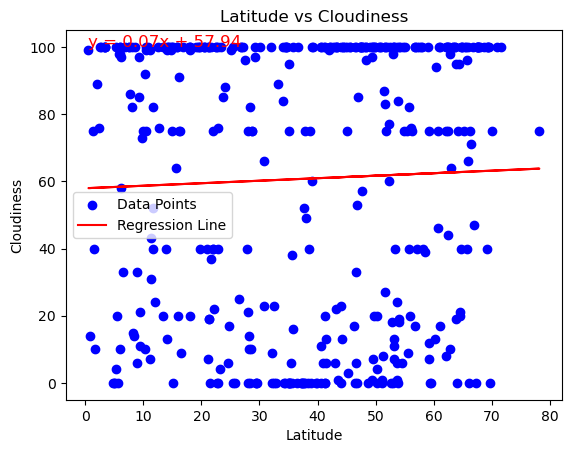

In [61]:
# Northern Hemisphere
plot5=plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")
plot5


R^2 Value: 0.007746885184602971


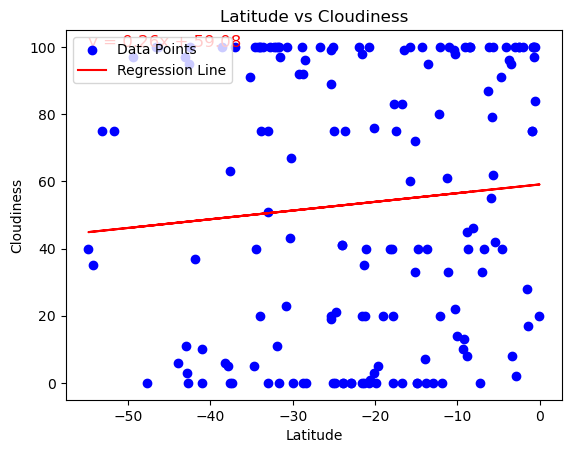

In [62]:
# Southern Hemisphere
plot6=plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")
plot6

**Discussion about the linear relationship:**  there tends to be a weak correlation. Latitude alone does notinfluence cloudiness patterns. Cloud formation is more complex and influenced by other atmospheric factors such as proximity to oceans, winds, and other weather systems. There are trends, such as more cloudiness near the equator or in coastal regions, but the overall regression analysis shows a low R^2 value, meaning that cloudiness is not dependent on latitude.

### Wind Speed vs. Latitude Linear Regression Plot

R^2 Value: 2.901583448775737e-06


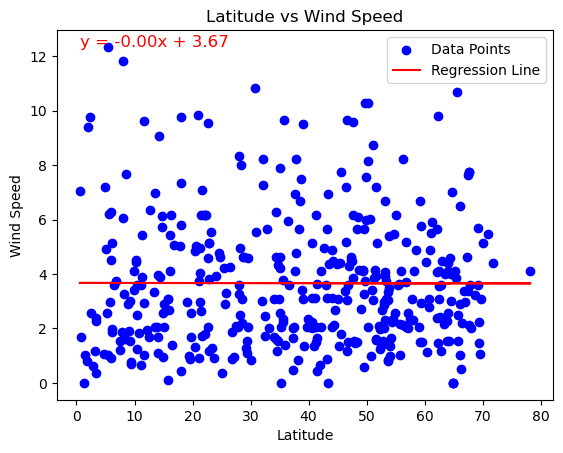

In [63]:
# Northern Hemisphere
plot7=plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")
plot7

R^2 Value: 0.0377944836084245


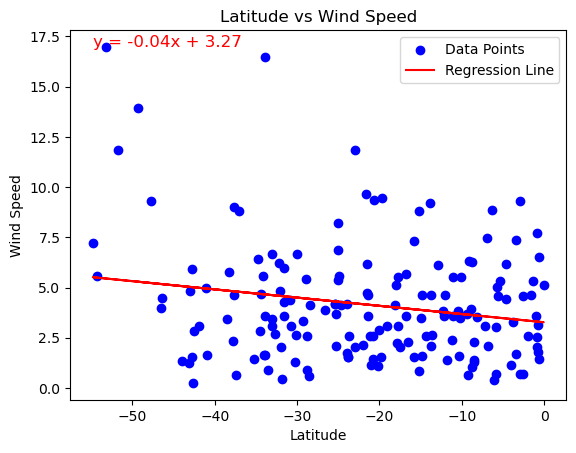

In [64]:
# Southern Hemisphere
plot4=plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")
plot4

**Discussion about the linear relationship:** The linear regression analysis reveals a weak correlation, with very small R^2 values. This suggests that latitude alone is not a strong predictor of wind speed. In both hemispheres, wind speeds are influenced more by regional weather patterns, geography, and atmospheric conditions rather than latitude. 